# Import Dependencies

In [19]:
import os

os.environ['PROJ_LIB'] = r'c:\Users\ravin\Anaconda3\Library\share'

import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap

# Combining all of the data into one DataFrame, adding regions for countries with no region listed, removing null values, and adding years for the rankings (mostly done in Excel)

In [28]:
def data_clean():
    # Combines all of the spreadsheets into one DataFrame
    df = pd.concat([pd.read_csv(f) for f in glob.glob('Data/*.csv')], 
                             ignore_index = True, sort = True)

    # Create list of unwanted columns to remove
    labels = ['Upper Confidence Interval', 'Lower Confidence Interval', 'Standard Error', 'Social support', 'Dystopia Residual']

    # Drop columns from dataframe
    clean_df = df.drop(columns = labels)
    
    return clean_df

data_clean()

# data_clean().to_csv('clean_df.csv') convert file into csv to add regions and use for final dataframe

final_df = pd.read_csv('clean_df3.csv') # after adding regions in excel, save the csv and read into pandas dataframe

final_df

,Country,Family,Freedom,GDP per Capita,Generosity,Happiness Rank,Happiness Score,Life Expectancy,Region,Trust (Government Corruption),Year
0,Switzerland,1.34951,0.66557,1.39651,0.29678,1,7.587,0.94143,Western Europe,0.41978,2015
1,Iceland,1.40223,0.62877,1.30232,0.43630,2,7.561,0.94784,Western Europe,0.14145,2015
2,Denmark,1.36058,0.64938,1.32548,0.34139,3,7.527,0.87464,Western Europe,0.48357,2015
3,Norway,1.33095,0.66973,1.45900,0.34699,4,7.522,0.88521,Western Europe,0.36503,2015
4,Canada,1.32261,0.63297,1.32629,0.45811,5,7.427,0.90563,North America,0.32957,2015
...,...,...,...,...,...,...,...,...,...,...,...
777,Rwanda,NaN,0.55500,0.35900,0.21700,152,3.334,0.61400,Sub-Saharan Africa,0.41100,2019
778,Tanzania,NaN,0.41700,0.47600,0.27600,153,3.231,0.49900,Sub-Saharan Africa,0.14700,2019
779,Afghanistan,NaN,0.00000,0.35000,0.15800,154,3.203,0.36100,Southern Asia,0.02500,2019
780,Central African Republic,NaN,0.22500,0.02600,0.23500,155,3.083,0.10500,Sub-Saharan Africa,0.03500,2019


# EDA

In [29]:
def corr_matrix():
    labels = ['Year']
    
    # Create matrix and drop unwanted columns from both axes
    corr = final_df.corr()
    corr2 = corr.drop(columns = labels, axis = 1)
    corr3 = corr2.drop(labels, axis = 0)
    
    return corr3

corr_matrix()

,Family,Freedom,GDP per Capita,Generosity,Happiness Rank,Happiness Score,Life Expectancy,Trust (Government Corruption)
Family,1.000000,0.425377,0.585449,0.071775,-0.637627,0.636532,0.486383,0.158605
Freedom,0.425377,1.000000,0.340511,0.290706,-0.537942,0.551258,0.340745,0.459593
GDP per Capita,0.585449,0.340511,1.000000,-0.014560,-0.794791,0.789284,0.784338,0.306307
Generosity,0.071775,0.290706,-0.014560,1.000000,-0.117713,0.137578,0.010638,0.318920
Happiness Rank,-0.637627,-0.537942,-0.794791,-0.117713,1.000000,-0.992066,-0.743655,-0.372781
Happiness Score,0.636532,0.551258,0.789284,0.137578,-0.992066,1.000000,0.742456,0.398418
Life Expectancy,0.486383,0.340745,0.784338,0.010638,-0.743655,0.742456,1.000000,0.250512
Trust (Government Corruption),0.158605,0.459593,0.306307,0.318920,-0.372781,0.398418,0.250512,1.000000


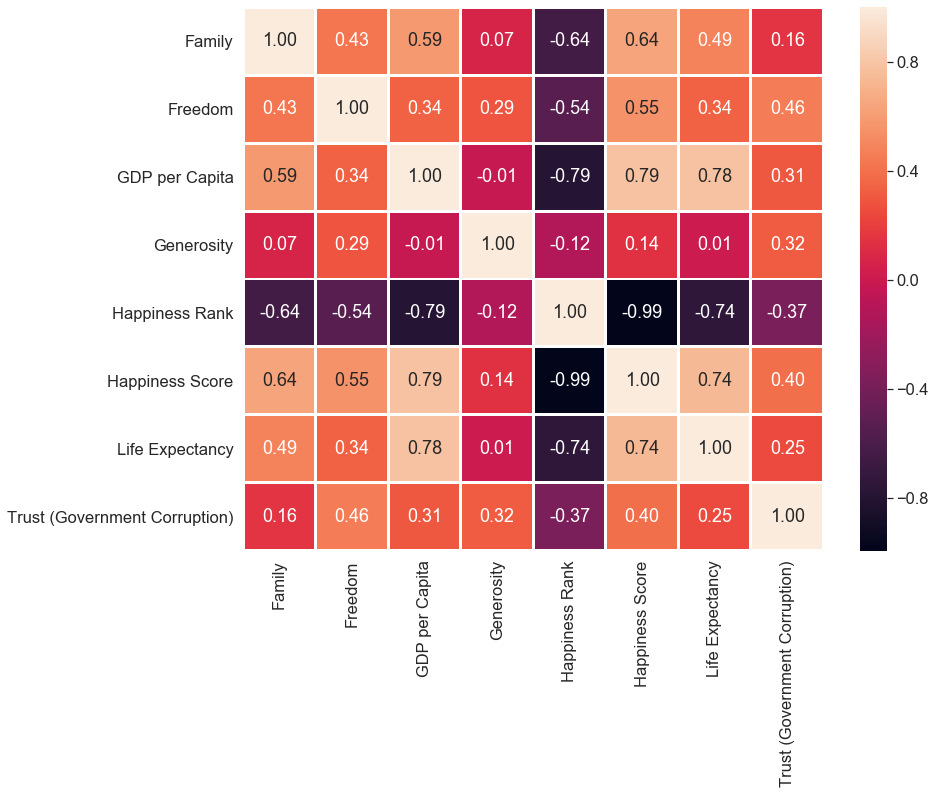

In [30]:
def corr_plot():
    fig = plt.figure(figsize=(13,10))

    sns.set(style="dark",font_scale=1.5)

    cmap = sns.color_palette('bright')

    sns.heatmap(corr_matrix(), linewidth=2, annot = True, fmt= '.2f')
    plt.show()

corr_plot()

In [10]:
def region_averages():
    
    # Create averages per region
    freedom_average = final_df.groupby(['Region']).mean()['Freedom'].rename('Average Freedom')
    trust_average = final_df.groupby(['Region']).mean()['Trust (Government Corruption)'].rename('Average Trust')
    gdp_average = final_df.groupby(['Region']).mean()['GDP per Capita'].rename('Average GDP')
    life_average = final_df.groupby(['Region']).mean()['Life Expectancy'].rename('Average Life Expectancy')
    happy_average = final_df.groupby(['Region']).mean()['Happiness Score'].rename('Average Happiness Score')
    genorosity_average = final_df.groupby(['Region']).mean()['Generosity'].rename('Average Generosity')
    family_average = final_df.groupby(['Region']).mean()['Family'].rename('Average Family')

    # Create dataframe with averages
    data = pd.DataFrame({'Average Happiness Score': happy_average, 'Average Life Expectancy':life_average, 'Average Freedom': freedom_average,
                         'Trust (Government Corruption)': trust_average, 'Average GDP': gdp_average, 'Average Generosity': genorosity_average,
                        'Average Family': family_average})
    
    # Sort dataframe by Happiness
    data = data.sort_values(by =['Average Happiness Score'],ascending = False)
    return data

region_averages() 

,Average Happiness Score,Average Life Expectancy,Average Freedom,Trust (Government Corruption),Average GDP,Average Generosity,Average Family
Region,,,,,,,
Australia and New Zealand,7.294600,0.903074,0.611413,0.357294,1.356197,0.424441,1.327446
North America,7.174700,0.861086,0.558918,0.223345,1.422037,0.372339,1.269152
Western Europe,6.726755,0.893708,0.514098,0.220756,1.366635,0.269526,1.244900
Latin America and Caribbean,6.020725,0.676763,0.463089,0.093807,0.936425,0.185513,1.091907
Eastern Asia,5.651567,0.862612,0.418185,0.117992,1.237695,0.199801,1.106942
Central and Eastern Europe,5.428875,0.695550,0.352283,0.075969,1.018734,0.156806,1.065728
Middle East and Northern Africa,5.337208,0.665565,0.348679,0.144670,1.102633,0.178271,0.904168
Southeastern Asia,5.335227,0.635452,0.543723,0.136140,0.893340,0.384195,0.984215
Southern Asia,4.580657,0.513089,0.392867,0.100357,0.638813,0.300888,0.685964


# Happiness Score of the different Regions from 2015 to 2019

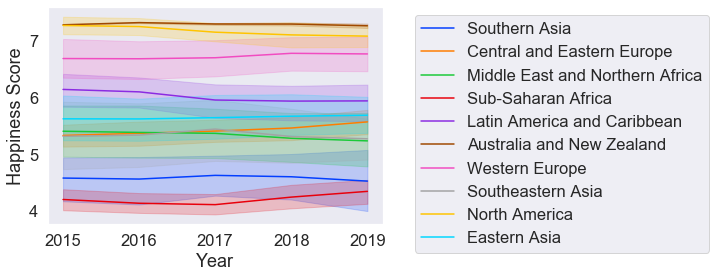

In [11]:
def happiness_score():
    
    # Creating color palette
    palette = sns.color_palette("bright")
    
    # Creating plot and legend
    happiness_score = sns.lineplot(y='Happiness Score', x='Year', hue='Region', data = final_df, legend = False,
                                  palette = palette)
    plt.legend(labels = final_df['Region'].drop_duplicates(),loc='upper right', bbox_to_anchor=(2, 1))

happiness_score()

# GDP per Capita of the different Regions from 2015 to 2019

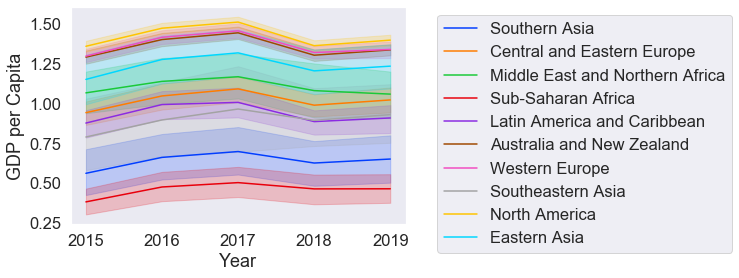

In [12]:
def GDP_per_Capita():
    
    # Creating color palette
    palette = sns.color_palette("bright")
    
    # Creating plot and legend
    GDP_per_Capita = sns.lineplot(x='Year',y='GDP per Capita', hue='Region', data = final_df, legend = False, 
                                  palette = palette)
    plt.legend(labels = final_df['Region'].drop_duplicates(),loc='upper right', bbox_to_anchor=(2, 1))

    
GDP_per_Capita()

# Life expectancy of the different Regions from 2015 to 2019


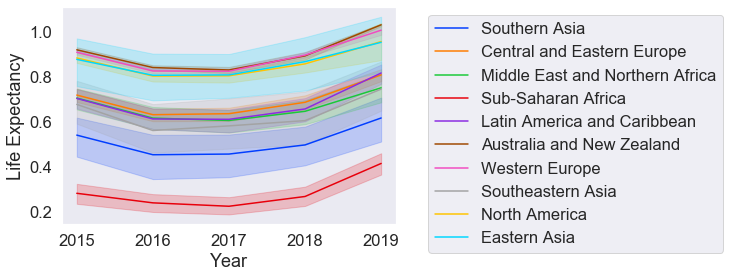

In [13]:
def Life_expectancy():
    
    # Creating color palette
    palette = sns.color_palette("bright")

    # Creating plot and legend
    Life_expectancy = sns.lineplot(x='Year', y='Life Expectancy', hue='Region', data = final_df, legend = False,
                                      palette = palette)
    plt.legend(labels = final_df['Region'].drop_duplicates(),loc='upper right', bbox_to_anchor=(2, 1))
    

Life_expectancy()

# Factors affecting Happiness by Region

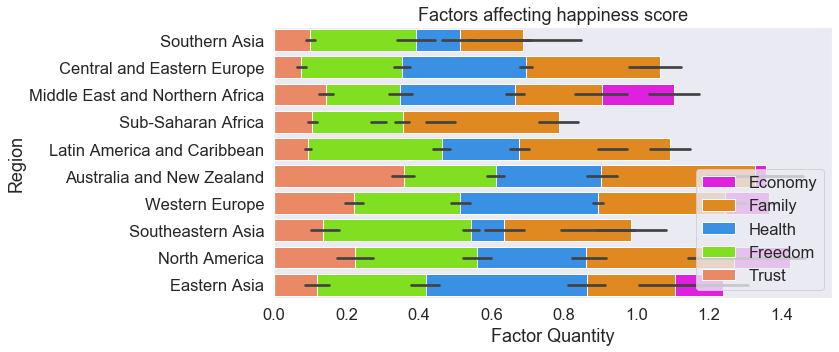

In [14]:
def happiness_factors():
    
    f,ax = plt.subplots(figsize = (10,5))
    sns.set_color_codes("bright")
    
    sns.barplot(x = 'GDP per Capita', y = 'Region', data = final_df ,label="Economy", color ='magenta')
    sns.barplot(x = 'Family',y = 'Region', data = final_df, label="Family", color ='darkorange')
    sns.barplot(x = 'Life Expectancy', y ='Region',data = final_df, label="Health", color = 'dodgerblue')
    sns.barplot(x = 'Freedom', y ='Region', data = final_df, label="Freedom", color = 'chartreuse')
    sns.barplot(x = 'Trust (Government Corruption)', y ='Region', data = final_df, label="Trust", color = 'coral')
    
    ax.legend(loc = "lower right",frameon = True)
    ax.set(xlabel='Factor Quantity', ylabel='Region',title = "Factors affecting happiness score")
    plt.show()
    
happiness_factors()

#  Map of the Regions

In [15]:
# Read in latitude and longitude graphs
concap = pd.read_csv('country-capitals.csv')
concap.head()

,CountryName,CapitalName,CapitalLatitude,CapitalLongitude,CountryCode,ContinentName
0,Somaliland,Hargeisa,9.550000,44.050000,NaN,Africa
1,South Georgia and South Sandwich Islands,King Edward Point,-54.283333,-36.500000,GS,Antarctica
2,French Southern and Antarctic Lands,Port-aux-Français,-49.350000,70.216667,TF,Antarctica
3,Palestine,Jerusalem,31.766667,35.233333,PS,Asia
4,Aland Islands,Mariehamn,60.116667,19.900000,AX,Europe


In [16]:
# Merge latitude and longitude with main dataset
full_df = pd.merge(concap[['CountryName', 'CapitalName', 'CapitalLatitude', 'CapitalLongitude']],\
         final_df,left_on='CountryName',right_on='Country')

full_df

,CountryName,CapitalName,CapitalLatitude,CapitalLongitude,Unnamed: 0,Country,Family,Freedom,GDP per Capita,Generosity,Happiness Rank,Happiness Score,Life Expectancy,Region,Trust (Government Corruption),Year
0,Afghanistan,Kabul,34.516667,69.183333,152,Afghanistan,0.302850,0.23414,0.319820,0.365100,153,3.575,0.303350,Southern Asia,0.097190,2015
1,Afghanistan,Kabul,34.516667,69.183333,311,Afghanistan,0.110370,0.16430,0.382270,0.312680,154,3.360,0.173440,Southern Asia,0.071120,2016
2,Afghanistan,Kabul,34.516667,69.183333,455,Afghanistan,0.581543,0.10618,0.401477,0.311871,141,3.794,0.180747,Southern Asia,0.061158,2017
3,Afghanistan,Kabul,34.516667,69.183333,614,Afghanistan,NaN,0.08500,0.332000,0.191000,145,3.632,0.255000,Southern Asia,0.036000,2018
4,Afghanistan,Kabul,34.516667,69.183333,779,Afghanistan,NaN,0.00000,0.350000,0.158000,154,3.203,0.361000,Southern Asia,0.025000,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746,Northern Cyprus,North Nicosia,35.183333,33.366667,689,Northern Cyprus,NaN,0.41700,1.263000,0.191000,64,5.718,1.042000,Western Europe,0.162000,2019
747,Hong Kong,NaN,0.000000,0.000000,71,Hong Kong,1.058180,0.59608,1.386040,0.394780,72,5.474,1.013280,Eastern Asia,0.371240,2015
748,Hong Kong,NaN,0.000000,0.000000,232,Hong Kong,0.870210,0.48079,1.510700,0.400970,75,5.458,0.952770,Eastern Asia,0.316470,2016
749,Hong Kong,NaN,0.000000,0.000000,545,Hong Kong,NaN,0.52400,1.405000,0.246000,76,5.430,1.030000,Eastern Asia,0.291000,2018


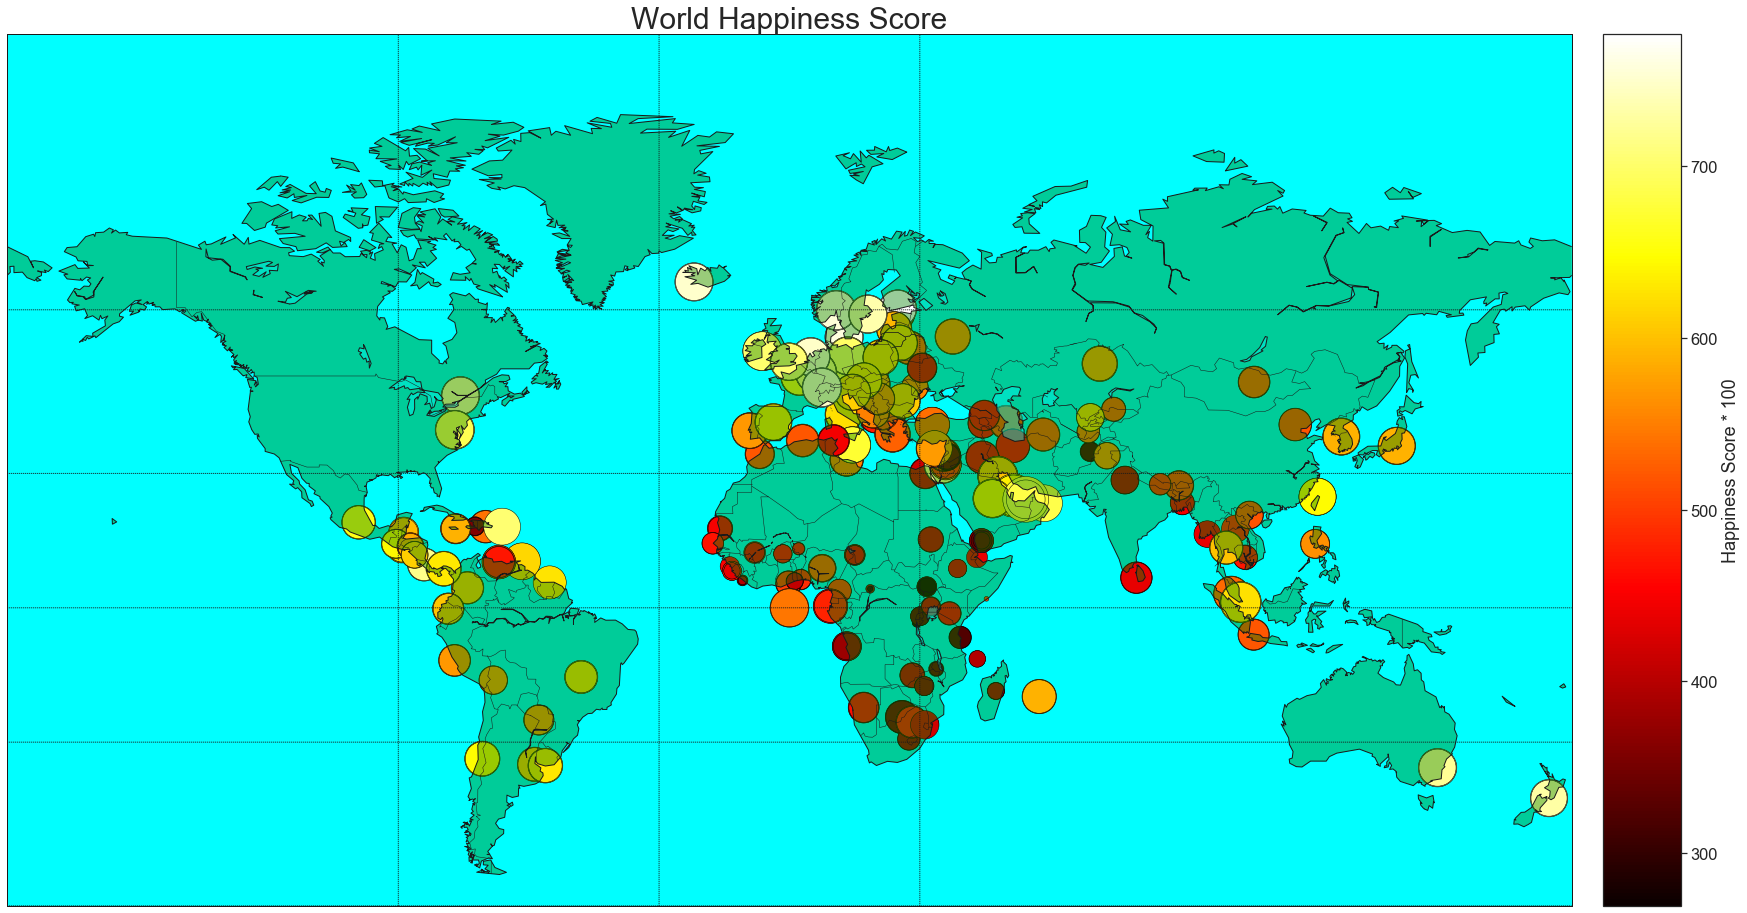

In [38]:
# Map for world happiness of all countries
def mapWorldHappiness():
    m = Basemap(projection='mill',llcrnrlat=-60,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,resolution='c')
    m.drawcoastlines()
    m.drawcountries()
    m.drawparallels(np.arange(-90,91.,30.))
    m.drawmeridians(np.arange(-90,90.,60.))
    
    m.drawmapboundary(fill_color='aqua')
    lat = full_df['CapitalLatitude'].values
    lon = full_df['CapitalLongitude'].values
    a_1 = full_df['Happiness Score'].values
    a_2 = full_df['GDP per Capita'].values
    m.scatter(lon, lat, latlon=True,c=100*a_1,s=1000*a_2,linewidth=0.5,edgecolors='black',cmap='hot', alpha=1)
    
    m.fillcontinents(color='green',lake_color='aqua',alpha=0.4)
    cbar = m.colorbar()
    cbar.set_label('Happiness Score * 100')
    plt.title("World Happiness Score", fontsize=30)
    plt.show()
    
sns.set(style="white",font_scale=1.5)
plt.figure(figsize=(30,30))

mapWorldHappiness()